## Load and prepare data

In [1]:
import numpy as np
import keras

# First install CIFAR10 from Keras
from keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [3]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10

y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [4]:
#Scale the values of the images (X) to a range of 0 to 1.  Do this for all three sets (x_train, x_valid, x_test).
x_train = x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0

In [5]:
class_names = ['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']

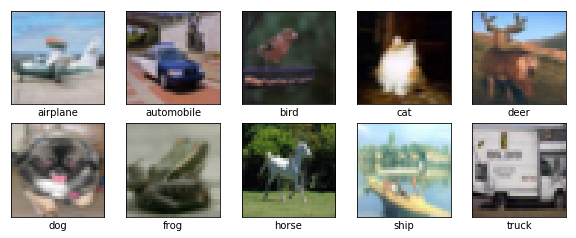

In [6]:
#Show (any) one image per class from the training set.  Show the (total 10) images in a grid similar to the Tensor tutorial.
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(10,10))
index = 0
for i in range(200):
    if y_train[i] == index:
        plt.subplot(5,5,index+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i],cmap=plt.cm.RdYlGn)
        plt.xlabel(class_names[y_train[i][0]])
        index+=1

## Build and train network

In [7]:
#Build a base model, for example:
#[1st layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
#[2nd layer] Max pooling -- size 2x2, stride (2,2)
#[3rd layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
#[4th layer] Max pooling -- size 2x2, stride (2,2)
#[5th layer] Fully connected (Dense) -- 512 nodes, activation relu
#[6th layer] Fully connected (Dense) -- 10 nodes, activation softmax
#Note that you need to flatten the image before the fully connected layer (5th).

In [8]:
#create baseline model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
baseline_model = keras.models.Sequential()
baseline_model.add(Conv2D(32,(5,5),strides=(1,1),activation='relu',input_shape=(32,32,3)))
baseline_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
baseline_model.add(Conv2D(32,(5,5),strides=(1,1),activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
baseline_model.add(Flatten())
baseline_model.add(Dense(512,activation='relu'))
baseline_model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total para

In [10]:
# compile the model.Use loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] 
baseline_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
#Train the model
baseline_history = baseline_model.fit(x_train,y_train_bin,batch_size=400,epochs=30,validation_data=(x_valid,y_valid_bin))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 4s 95us/step - loss: 1.7527 - acc: 0.3707 - val_loss: 1.5296 - val_acc: 0.4502
Epoch 2/30
40000/40000 [==============================] - 1s 37us/step - loss: 1.4231 - acc: 0.4868 - val_loss: 1.3541 - val_acc: 0.5226
Epoch 3/30
40000/40000 [==============================] - 1s 37us/step - loss: 1.2883 - acc: 0.5431 - val_loss: 1.2449 - val_acc: 0.5556
Epoch 4/30
40000/40000 [==============================] - 1s 37us/step - loss: 1.2006 - acc: 0.5751 - val_loss: 1.2092 - val_acc: 0.5742
Epoch 5/30
40000/40000 [==============================] - 1s 37us/step - loss: 1.1193 - acc: 0.6063 - val_loss: 1.1395 - val_acc: 0.6018
Epoch 6/30
40000/40000 [==============================] - 1s 37us/step - loss: 1.0569 - acc: 0.6303 - val_loss: 1.1046 - val_acc: 0.6161
Epoch 7/30
40000/40000 [==============================] - 1s 37us/step - loss: 0

In [12]:
#how the model performs on the test dataset
test_loss1, test_acc1 = baseline_model.evaluate(x_test,y_test_bin)
print('Test accuracy: ',test_acc1)

10000/10000 [==============================] - 1s 96us/step
Test accuracy:  0.6632


In [13]:
# Add more convolution layers
#In the first model you built, there were two Conv layers.Now, add one more Conv layer
three_layer_model = keras.Sequential()
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
three_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
three_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
three_layer_model.add(Flatten())
three_layer_model.add(Dense(512, activation='relu'))
three_layer_model.add(Dense(10, activation='softmax'))

three_layer_model.summary()

three_layer_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

three_layer_history = three_layer_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss2, test_acc2 = three_layer_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
__________

In [14]:
#change the number of filters
#In the first model, in each layer there were 32 Conv filters. 
#CHange the number of filters to either 16 or 64 or other numbers
# e.g.  one layer can have 32 and the other layer can have 64 or 128.
filter64_model = keras.models.Sequential()
# change from 32 cov filters to 64 conv filters
filter64_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
filter64_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter64_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu'))
filter64_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter64_model.add(Flatten())
filter64_model.add(Dense(512, activation='relu'))
filter64_model.add(Dense(10, activation='softmax'))

filter64_model.summary()

filter64_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

filter64_history = filter64_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss3, test_acc3 = filter64_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total para

In [15]:
filter16_model = keras.models.Sequential()
# change from 32 cov filters to 16 conv filters
filter16_model.add(Conv2D(16, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
filter16_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter16_model.add(Conv2D(16, (5, 5), strides = (1,1), activation='relu'))
filter16_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter16_model.add(Flatten())
filter16_model.add(Dense(512, activation='relu'))
filter16_model.add(Dense(10, activation='softmax'))

filter16_model.summary()

filter16_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

filter16_history = filter16_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss4, test_acc4 = filter16_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        6416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               205312    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total para

In [16]:
# change the size of filters. 
#In the first model the filter size was 5*5. Increase or decrease the size of filters. 
# e.g. You can try filter with the size of 3*3 or 7*7.

In [17]:
# model with 64 number of filters,(7,7) size of filters, 3 convolution layers
fun_model_1 = keras.models.Sequential()
# change from 32 cov filters to 64 conv filters
fun_model_1.add(Conv2D(64, (7,7), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
fun_model_1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_1.add(Conv2D(64, (7,7), strides = (1,1), activation='relu'))
fun_model_1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_1.add(Flatten())
fun_model_1.add(Dense(512, activation='relu'))
fun_model_1.add(Dense(10, activation='softmax'))

fun_model_1.summary()

fun_model_1.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

fun_model_1_history = fun_model_1.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss5, test_acc5 = fun_model_1.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        9472      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          200768    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               295424    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

In [18]:
# model with 32/64 number of filters,(3,3) size of filters, 3 convolution layers
fun_model_2 = keras.models.Sequential()
fun_model_2.add(Conv2D(32, (3,3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
fun_model_2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_2.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
fun_model_2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_2.add(Flatten())
fun_model_2.add(Dense(512, activation='relu'))
fun_model_2.add(Dense(10, activation='softmax'))

fun_model_2.summary()

fun_model_2.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

fun_model_2_history = fun_model_2.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss6, test_acc6 = fun_model_2.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total para

In [19]:
# model with 32/64 number of filters,(3,3) size of filters, 3 convolution layers
fun_model_21 = keras.models.Sequential()
fun_model_21.add(Conv2D(64, (3,3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
fun_model_21.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_21.add(Conv2D(32, (3,3), strides = (1,1), activation='relu'))
fun_model_21.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_21.add(Flatten())
fun_model_21.add(Dense(512, activation='relu'))
fun_model_21.add(Dense(10, activation='softmax'))

fun_model_21.summary()

fun_model_21.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

fun_model_21_history = fun_model_21.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss61, test_acc61 = fun_model_21.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc61)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               590336    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total para

In [20]:
# model with 32 number of filters,(9,9) size of filters, 2 convolution layers
fun_model_3 = keras.models.Sequential()
fun_model_3.add(Conv2D(32, (9,9), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
fun_model_3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_3.add(Conv2D(32, (9,9), strides = (1,1), activation='relu'))
fun_model_3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fun_model_3.add(Flatten())
fun_model_3.add(Dense(512, activation='relu'))
fun_model_3.add(Dense(10, activation='softmax'))

fun_model_3.summary()

fun_model_3.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

fun_model_3_history = fun_model_3.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss7, test_acc7 = fun_model_3.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 32)        7808      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 32)          82976     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total para

In [21]:
#Add more Fully Connected layers: In the first model you used just one FC layer. 
#You can try having two or more FC layers one after another.

# change 1 fc layer to 2 fc layers
fc2_model = keras.models.Sequential()
fc2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
fc2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fc2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
fc2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
fc2_model.add(Flatten())
fc2_model.add(Dense(512, activation='relu'))
fc2_model.add(Dense(512, activation='relu'))  #second fully connected layer
fc2_model.add(Dense(10, activation='softmax'))

fc2_model.summary()

fc2_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

fc2_model_history = fc2_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss8, test_acc8 = fc2_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
__________

In [22]:
#adding Dropout layers
dropout_model = keras.models.Sequential()
dropout_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
dropout_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
dropout_model.add(Flatten())
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.25))
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.summary()

dropout_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

dropout_history = dropout_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss9, test_acc9 = dropout_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc9)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               410112    
___________________________

In [23]:
# add L2 regularization
l2_model = keras.models.Sequential()
l2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Flatten())
l2_model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
l2_model.add(Dense(10, activation='softmax'))

l2_model.summary()

l2_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

l2_history = l2_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss10, test_acc10 = l2_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total para

In [24]:
# add L2 regularization, 64 number of filters, (3*3) size of filters, 3 conv layers
l2_model = keras.models.Sequential()
l2_model.add(Conv2D(32, (3, 3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
l2_model.add(Conv2D(64, (3, 3), strides = (1,1), activation='relu'))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Conv2D(64, (3, 3), strides = (1,1), activation='relu'))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Flatten())
l2_model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(512, activation='relu'))
l2_model.add(Dense(10, activation='softmax'))

l2_model.summary()

l2_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

l2_history = l2_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss11, test_acc11 = l2_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc11)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1180160   
__________

In [25]:
#PLot the traning (-) and validation(---) loss, a lower validation loss means better model

def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

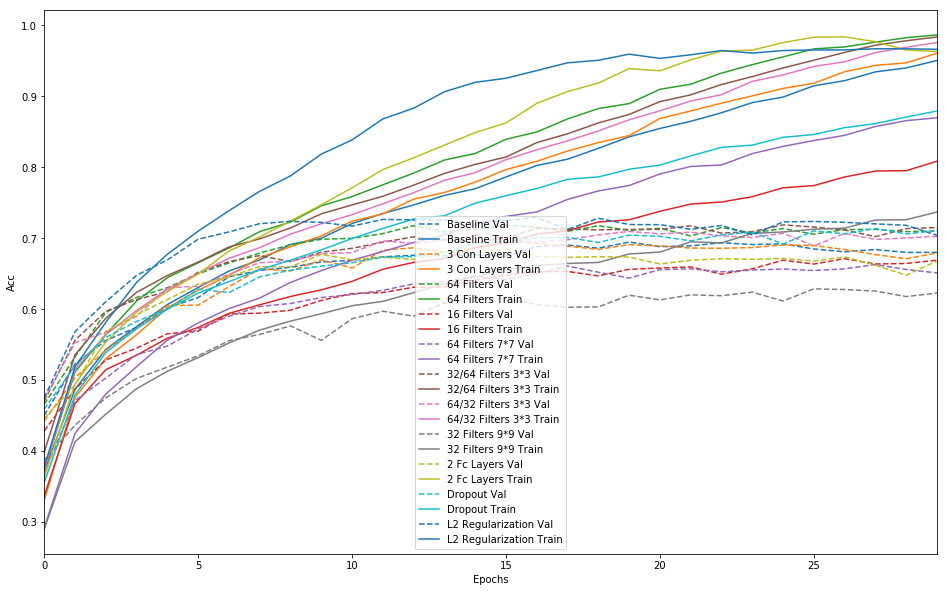

In [26]:
plot_history([('baseline', baseline_history),
              ('3 con layers', three_layer_history),
              ('64 filters', filter64_history),
              ('16 filters', filter16_history),
              ('64 filters 7*7', fun_model_1_history),
              ('32/64 filters 3*3', fun_model_2_history),
              ('64/32 filters 3*3', fun_model_21_history),
              ('32 filters 9*9', fun_model_3_history),
              ('2 fc layers', fc2_model_history),
              ('dropout', dropout_history),
              ('l2 regularization', l2_history)])

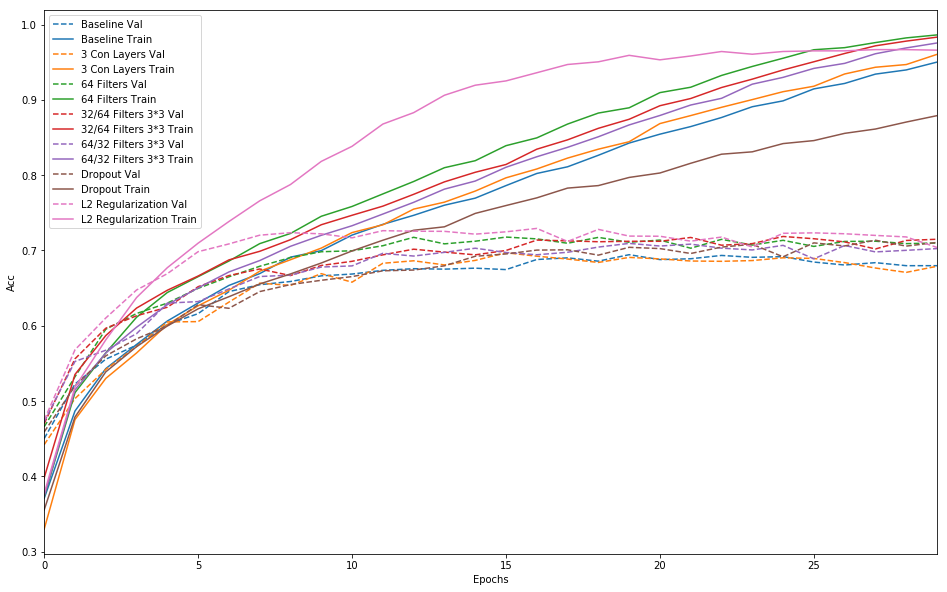

In [27]:
#Eliminate model whose performance is worse than baseline model.

plot_history([('baseline', baseline_history),
              ('3 con layers', three_layer_history),
              ('64 filters', filter64_history),
              ('32/64 filters 3*3', fun_model_2_history),
              ('64/32 filters 3*3', fun_model_21_history),
              ('dropout', dropout_history),
              ('l2 regularization', l2_history)])

In [28]:
# 5 conv layers, (5*5) size of filters, dropout percent = 0.5
model = keras.models.Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model_history = model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss12, test_acc12 = model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc12)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 32)          0         
__________

In [29]:
# 5 conv layers, (3*3) size of filters, 2fc layers, dropout percent = 0.25
model1 = keras.models.Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model1_history = model1.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss13, test_acc13 = model1.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc13)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
__________

In [30]:
# 4 conv layers, 64 number of filters, (3*3) size of filters, 2fc layers, dropout percent = 0.25
model2 = keras.models.Sequential()
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model2_history = model2.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss14, test_acc14 = model2.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc14)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 4096)              0         
__________

In [31]:
# 4 conv layers, (3*3) size of filters, 2fc layers, dropout=0.1 before first maxpooling,
# dropout=0.25 before second maxpooling, dropout=0.35 after fc  
model3 = keras.models.Sequential()
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Dropout(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Dropout(0.25))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.35))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model3_history = model3.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss15, test_acc15 = model3.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc15)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
__________

In [32]:
# model with 32/64 number of filters,(3,3) size of filters, 3 convolution layers, with dropouts
model4 = keras.models.Sequential()
model4.add(Conv2D(32, (3,3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
model4.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
model4.add(Dropout(0.1))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model4.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
model4.add(Dropout(0.2))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.summary()

model4.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model4_history = model4.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss16, test_acc16= model4.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 64)          0         
__________

In [33]:
# model with 32/64 number of filters,(3,3) size of filters, 4 convolution layers, with dropouts
model5 = keras.models.Sequential()
model5.add(Conv2D(32, (3,3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
model5.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
model5.add(Dropout(0.3))
model5.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model5.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
model5.add(Conv2D(64, (3,3), strides = (1,1), activation='relu'))
model5.add(Dropout(0.4))
model5.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

model5.summary()

model5.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model5_history = model5.fit(x_train, y_train_bin, batch_size=400, epochs=40, validation_split=0.3, validation_data=(x_valid, y_valid_bin))

test_loss17, test_acc17= model5.evaluate(x_test, y_test_bin,batch_size=400)

print('Test accuracy:', test_acc17)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 64)        0         
__________

In [34]:
test_loss17

0.6654605078697204

# Final Model

In [167]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler

model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5), input_shape=x_train.shape[1:]))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.35))

model2.add(Conv2D(128, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', activation='elu', kernel_regularizer=regularizers.l2(1e-5)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.7))

model2.add(Flatten())
model2.add(Dense(512,activation='elu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
def lr_schedule(epoch):
    lrate = 0.001
    
    if epoch > 25:
        lrate = 0.01
    if epoch > 50:
        lrate = 0.008
    
    return lrate
 
opt = keras.optimizers.rmsprop(lr=0.001,decay=1e-3)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
batch_size=64
model2_history = model2.fit_generator(datagen.flow(x_train, y_train_bin, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=200,
                    verbose=1,validation_data=(x_valid,y_valid_bin),
                    callbacks=[LearningRateScheduler(lr_schedule)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_562 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_513 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_563 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_514 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_303 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_314 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_564 (Conv2D)          (None, 16, 16, 64)        36928     
__________

625/625 [==============================] - 22s 35ms/step - loss: 0.4199 - acc: 0.8701 - val_loss: 0.4383 - val_acc: 0.8661
Epoch 93/200
625/625 [==============================] - 22s 35ms/step - loss: 0.4253 - acc: 0.8690 - val_loss: 0.4028 - val_acc: 0.8748
Epoch 94/200
625/625 [==============================] - 22s 36ms/step - loss: 0.4236 - acc: 0.8674 - val_loss: 0.4492 - val_acc: 0.8707
Epoch 95/200
625/625 [==============================] - 22s 35ms/step - loss: 0.4187 - acc: 0.8704 - val_loss: 0.4626 - val_acc: 0.8638
Epoch 96/200
625/625 [==============================] - 24s 38ms/step - loss: 0.4207 - acc: 0.8709 - val_loss: 0.4207 - val_acc: 0.8738
Epoch 97/200
625/625 [==============================] - 23s 36ms/step - loss: 0.4097 - acc: 0.8719 - val_loss: 0.4356 - val_acc: 0.8706
Epoch 98/200
625/625 [==============================] - 22s 36ms/step - loss: 0.4167 - acc: 0.8716 - val_loss: 0.4180 - val_acc: 0.8749
Epoch 99/200
625/625 [==============================] - 22s 3

Epoch 152/200
625/625 [==============================] - 21s 33ms/step - loss: 0.3681 - acc: 0.8881 - val_loss: 0.4266 - val_acc: 0.8804
Epoch 153/200
625/625 [==============================] - 21s 33ms/step - loss: 0.3647 - acc: 0.8900 - val_loss: 0.3864 - val_acc: 0.8845
Epoch 154/200
625/625 [==============================] - 20s 33ms/step - loss: 0.3631 - acc: 0.8889 - val_loss: 0.4124 - val_acc: 0.8793
Epoch 155/200
625/625 [==============================] - 21s 33ms/step - loss: 0.3656 - acc: 0.8884 - val_loss: 0.3948 - val_acc: 0.8830
Epoch 156/200
625/625 [==============================] - 21s 33ms/step - loss: 0.3662 - acc: 0.8888 - val_loss: 0.4167 - val_acc: 0.8759
Epoch 157/200
625/625 [==============================] - 20s 33ms/step - loss: 0.3633 - acc: 0.8896 - val_loss: 0.3863 - val_acc: 0.8857
Epoch 158/200
625/625 [==============================] - 21s 33ms/step - loss: 0.3627 - acc: 0.8893 - val_loss: 0.4066 - val_acc: 0.8844
Epoch 159/200
625/625 [==================

In [168]:
test_loss2,test_acc2 = model2.evaluate(x_test, y_test_bin, verbose=1)
print('Test loss:', test_loss2)
print('Test accuracy:', test_acc2)

10000/10000 [==============================] - 4s 382us/step
Test loss: 0.420107395195961
Test accuracy: 0.8825


## Make Predictions

In [169]:
pred = model2.predict(x_test)

In [170]:
pred.shape

(10000, 10)

In [171]:
pred

array([[4.3548938e-05, 3.0067455e-04, 7.6079339e-04, ..., 1.2765593e-03,
        1.9834939e-04, 7.8314188e-05],
       [1.2407750e-04, 4.8488949e-04, 2.1591767e-07, ..., 1.5918037e-07,
        9.9936217e-01, 2.5209700e-05],
       [4.2359784e-04, 1.8865235e-02, 1.3795892e-05, ..., 7.4644813e-06,
        9.7977442e-01, 8.4525079e-04],
       ...,
       [4.7045738e-08, 6.1869002e-08, 2.6615482e-05, ..., 5.9622676e-06,
        7.2777809e-08, 9.8518527e-08],
       [1.4352950e-05, 9.9957854e-01, 9.8357464e-07, ..., 3.9303853e-07,
        3.0278554e-06, 3.9137338e-04],
       [4.6709632e-09, 2.3595739e-09, 2.0451441e-07, ..., 9.9994612e-01,
        4.1951123e-10, 2.6961988e-09]], dtype=float32)

In [172]:
import pandas as pd
names = ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9']
df = pd.DataFrame(pred,columns=names)
df.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,4.354894e-05,3.006746e-04,7.607934e-04,9.893330e-01,6.716411e-04,5.750764e-03,1.586232e-03,1.276559e-03,1.983494e-04,7.831419e-05
1,1.240775e-04,4.848895e-04,2.159177e-07,7.920327e-07,1.905583e-07,1.491942e-06,7.653866e-07,1.591804e-07,9.993622e-01,2.520970e-05
2,4.235978e-04,1.886524e-02,1.379589e-05,2.495432e-05,4.351632e-06,2.593384e-05,1.504108e-05,7.464481e-06,9.797744e-01,8.452508e-04
3,9.799009e-01,7.437795e-04,1.221938e-03,2.689710e-03,1.742233e-04,9.389210e-05,1.159821e-04,6.483033e-05,1.383737e-02,1.157471e-03
4,4.397072e-13,3.216013e-11,2.072299e-11,2.617434e-11,1.372356e-14,7.664645e-13,1.000000e+00,1.722870e-14,1.378337e-14,5.597591e-14


In [173]:
df.insert(0, 'id', range(1,df.shape[0]+1))

In [174]:
df.to_csv('model2.csv',index=False)

In [175]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1,4.354894e-05,3.006746e-04,7.607934e-04,9.893330e-01,6.716411e-04,5.750764e-03,1.586232e-03,1.276559e-03,1.983494e-04,7.831419e-05
1,2,1.240775e-04,4.848895e-04,2.159177e-07,7.920327e-07,1.905583e-07,1.491942e-06,7.653866e-07,1.591804e-07,9.993622e-01,2.520970e-05
2,3,4.235978e-04,1.886524e-02,1.379589e-05,2.495432e-05,4.351632e-06,2.593384e-05,1.504108e-05,7.464481e-06,9.797744e-01,8.452508e-04
3,4,9.799009e-01,7.437795e-04,1.221938e-03,2.689710e-03,1.742233e-04,9.389210e-05,1.159821e-04,6.483033e-05,1.383737e-02,1.157471e-03
4,5,4.397072e-13,3.216013e-11,2.072299e-11,2.617434e-11,1.372356e-14,7.664645e-13,1.000000e+00,1.722870e-14,1.378337e-14,5.597591e-14
